In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
df = pd.read_csv('wrangled_data.csv')

In [3]:
# choose relevant columns 
df.columns

df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided','job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]

In [6]:
# get dummy data 
df_dum = pd.get_dummies(df_model)

In [7]:
# train test split 
from sklearn.model_selection import train_test_split
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# multiple linear regression 
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

C:\Users\Toshiba\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.21
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           1.47e-94
Time:                        18:31:04   Log-Likelihood:                -3311.6
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     599   BIC:                             7568.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.6223      6.720      6.491      0.000      30.424      56.821
Rating                                                3.6068      1.937      1.862      0.063      -0.198       7.411
num_comp                                              2.2503      0.868      2.592      0.010       0.545       3.955
hourly                                              -36.5642      9.173     -3.986      0.000     -54.580     -18.549
employer_provided                                    31.3726     11.524      2.722      0.007       8.739      54.006
same_state                                            2.4862      2.619      0.949      0.343      -2.657       7.629
age                                                   0.0352      0.030      1.172      0.242      -0.024       0.094
python_yn                                             8.1374      2.523      3.225      0.001       3.182      13.093
spark                                                -0.5707      2.921     -0.195      0.845      -6.306       5.165
aws                                                   1.1215      2.736      0.410      0.682      -4.251       6.494
excel                                                -0.4049      2.268     -0.179      0.858      -4.858       4.049
desc_len                                             -0.0001      0.001     -0.171      0.864      -0.002       0.001
Size_-1                                              13.6110      8.629      1.577      0.115      -3.336      30.558
Size_1 to 50 employees                                1.1074      6.501      0.170      0.865     -11.660      13.874
Size_10000+ employees                                -2.8814      5.800     -0.497      0.619     -14.272       8.509
Size_1001 to 5000 employees                           6.1366      3.879      1.582      0.114      -1.481      13.754
Size_201 to 500 employees                             2.2564      3.873      0.583      0.560      -5.350       9.863
Size_5001 to 10000 employees                         -3.8754      5.441     -0.712      0.477     -14.561       6.810
Size_501 to 1000 employees                            2.1832      4.060      0.538      0.591      -5.790      10.156
Size_51 to 200 employees                              4.1998      4.422      0.950      0.343      -4.484      12.884
Size_Unknown                                         20.8847     13.992      1.493      0.136      -6.594      48.363
Type of ownership_-1                                 13.6110      8.629      1.577      0.115      -3.336      30.558
Type of ownership_College / University                6.4246     17.739      0.362      0.717     -28.413      41.263
Type of ownersh

In [34]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

accuracy = 100*np.mean(cross_val_score(rf,X_train,y_train, cv= 3))
print('Accuracy:', round(accuracy, 2), '%.')

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 60.8 %.


In [33]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
accuracy = 100*np.mean(cross_val_score(rf,X_train,y_train, cv= 3))
print('Accuracy:', round(accuracy, 2), '%.')

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 59.04 %.


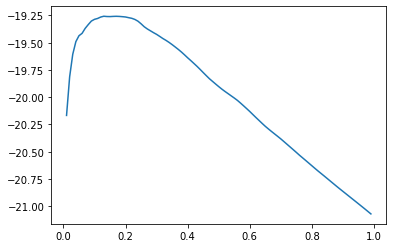

In [13]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [15]:
err = list(tuple(zip(alpha,error)))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
12,0.13,-19.25768


In [31]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

#print(np.mean(cross_val_score(rf,X_train,y_train, cv= 3)))
accuracy = 100*np.mean(cross_val_score(rf,X_train,y_train, cv= 3))
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 61.35 %.


C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
